In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = r'Dataset\heart.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values (if any)
data = data.dropna()  # Drop rows with missing values (or use imputation if necessary)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
Exerci

In [3]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [40]:
numerical_features = list(data.select_dtypes(include=['float64', 'int64']).columns)
numerical_features.remove('HeartDisease')

In [41]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [42]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,M,TA,-1.210356,0.596393,-0.551341,Normal,-0.188999,N,0.293283,Flat,1
914,1.536902,M,ASY,0.627078,-0.053049,1.813758,Normal,0.164684,N,2.357094,Flat,1
915,0.370100,M,ASY,-0.129513,-0.620168,-0.551341,Normal,-0.857069,Y,0.293283,Flat,1
916,0.370100,F,ATA,-0.129513,0.340275,-0.551341,LVH,1.461525,N,-0.832432,Flat,1


In [43]:
categorical_cols = [col for col in data.columns if data[col].dtype == "object"]
categorical_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [44]:
df = data

In [45]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [46]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [47]:
df["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [48]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [50]:
def one_hot_encode_nominal(df, include=[]):
    # Ensure included columns exist and are categorical
    categorical_cols = [col for col in include if col in df.columns and df[col].dtype == "object"]
    
    # Apply one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    return df_encoded

In [51]:
# - If you're working with the raw measurements, it's treated as continuous data (e.g., cholesterol level in mg/dL, EKG waveform values).
# - If it's already categorized (e.g., "healthy" vs. "unhealthy"), it's nominal—because once binned, there's no inherent numeric progression.
# - If the categories indicate severity levels, like EKG results being "normal," "borderline abnormal," and "abnormal," then it could be ordinal, since there's a logical order.

nominal_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']
data_encoded = one_hot_encode_nominal(data, include=nominal_cols)


In [52]:
ordinal_cols = [col for col in data.columns if col not in nominal_cols and data[col].dtype == "object"]
ordinal_cols

['ST_Slope']

In [53]:
ordinal_scale = []

for col in ordinal_cols:
    unique_values = data[col].unique()
    ordinal_scale.append((col, unique_values))

In [54]:
ordinal_scale

[('ST_Slope', array(['Up', 'Flat', 'Down'], dtype=object))]

In [55]:
# encoder = OrdinalEncoder(categories=[["never", "past", "current"]])
# data["smoking_status_encoded"] = encoder.fit_transform(data[["smoking_status"]])

# OR

ST_Slope_mapping = {"Down": 1, "Flat": 2, "Up": 3}

In [56]:
data_encoded["ST_Slope"] = data_encoded["ST_Slope"].map(ST_Slope_mapping)


In [57]:
data_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,3,0,True,True,False,False,True,False,False
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,2,1,False,False,True,False,True,False,False
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,3,0,True,True,False,False,False,True,False
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,2,1,False,False,False,False,True,False,True
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,3,0,True,False,True,False,True,False,False


In [58]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    float64
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   ST_Slope           918 non-null    int64  
 7   HeartDisease       918 non-null    int64  
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ATA  918 non-null    bool   
 10  ChestPainType_NAP  918 non-null    bool   
 11  ChestPainType_TA   918 non-null    bool   
 12  RestingECG_Normal  918 non-null    bool   
 13  RestingECG_ST      918 non-null    bool   
 14  ExerciseAngina_Y   918 non-null    bool   
dtypes: bool(7), float64(6), int64(2)
memory usage: 63.8 KB


In [59]:
# categorical_cols =['gender',
#                     'region',
#                     'income_level',
#                     'hypertension',
#                     'diabetes',
#                     'obesity',
#                     'family_history',
#                     'smoking_status',
#                     'alcohol_consumption',
#                     'physical_activity',
#                     'dietary_habits',
#                     'air_pollution_exposure',
#                     'stress_level',
#                     'EKG_results',
#                     'previous_heart_disease',
#                     'medication_usage',
#                     'participated_in_free_screening',
#                     'heart_attack']

In [60]:
data_continuous = data.drop(columns=nominal_cols)
data_continuous.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,Up,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,Flat,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,Up,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,Flat,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,Up,0


In [61]:
print(data_continuous.isnull().sum())  # Shows count of missing values per column
print(data_continuous.isna().sum())    # Alternative way to check for missing values

Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
ST_Slope        0
HeartDisease    0
dtype: int64
Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
ST_Slope        0
HeartDisease    0
dtype: int64


In [62]:
data_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    float64
 1   RestingBP     918 non-null    float64
 2   Cholesterol   918 non-null    float64
 3   FastingBS     918 non-null    float64
 4   MaxHR         918 non-null    float64
 5   Oldpeak       918 non-null    float64
 6   ST_Slope      918 non-null    object 
 7   HeartDisease  918 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 57.5+ KB


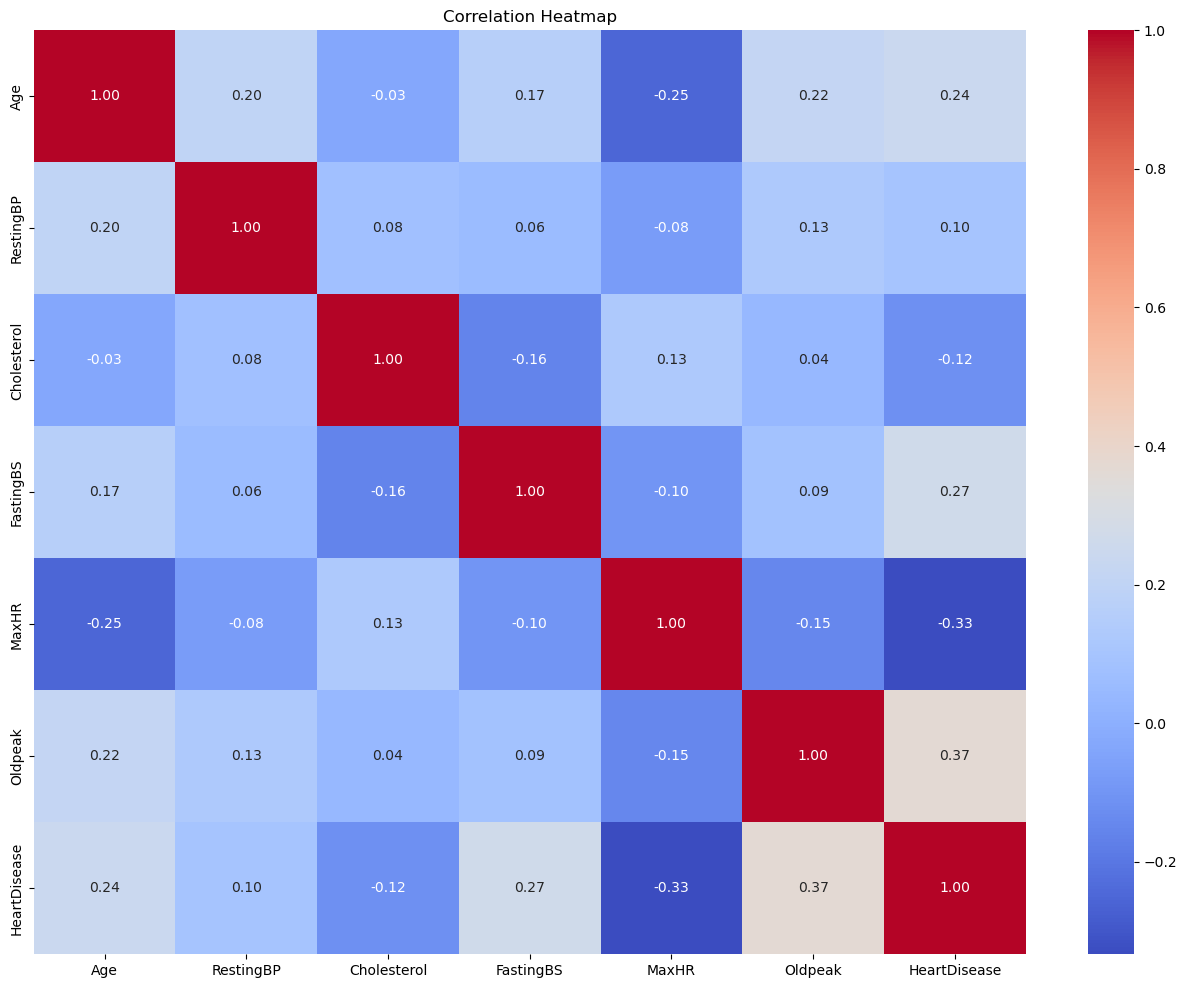

In [63]:
# Exploratory Data Analysis (EDA)
# Correlation heatmap
numerical_features = data_continuous.select_dtypes(include=["int64", "float64"])
corr_matrix = numerical_features.corr(method='kendall')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [64]:
filtered_corr = corr_matrix["HeartDisease"][abs(corr_matrix["HeartDisease"]) > 0.05]
filtered_columns = filtered_corr.index.tolist()
print(filtered_columns)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


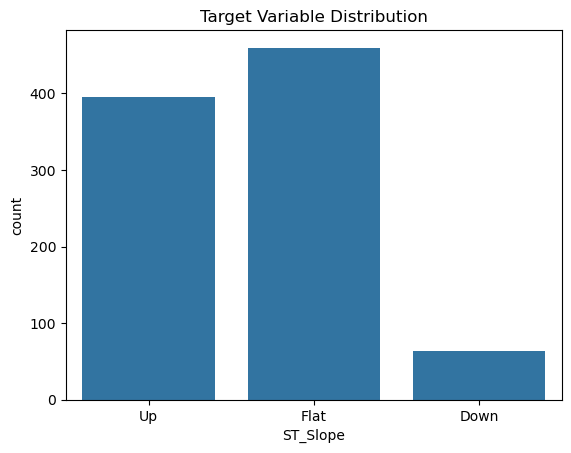

In [65]:
# Distribution of target variable
for col in ordinal_cols:
    target_column = col  
    sns.countplot(x=target_column, data=data)
    plt.title('Target Variable Distribution')
    plt.show()

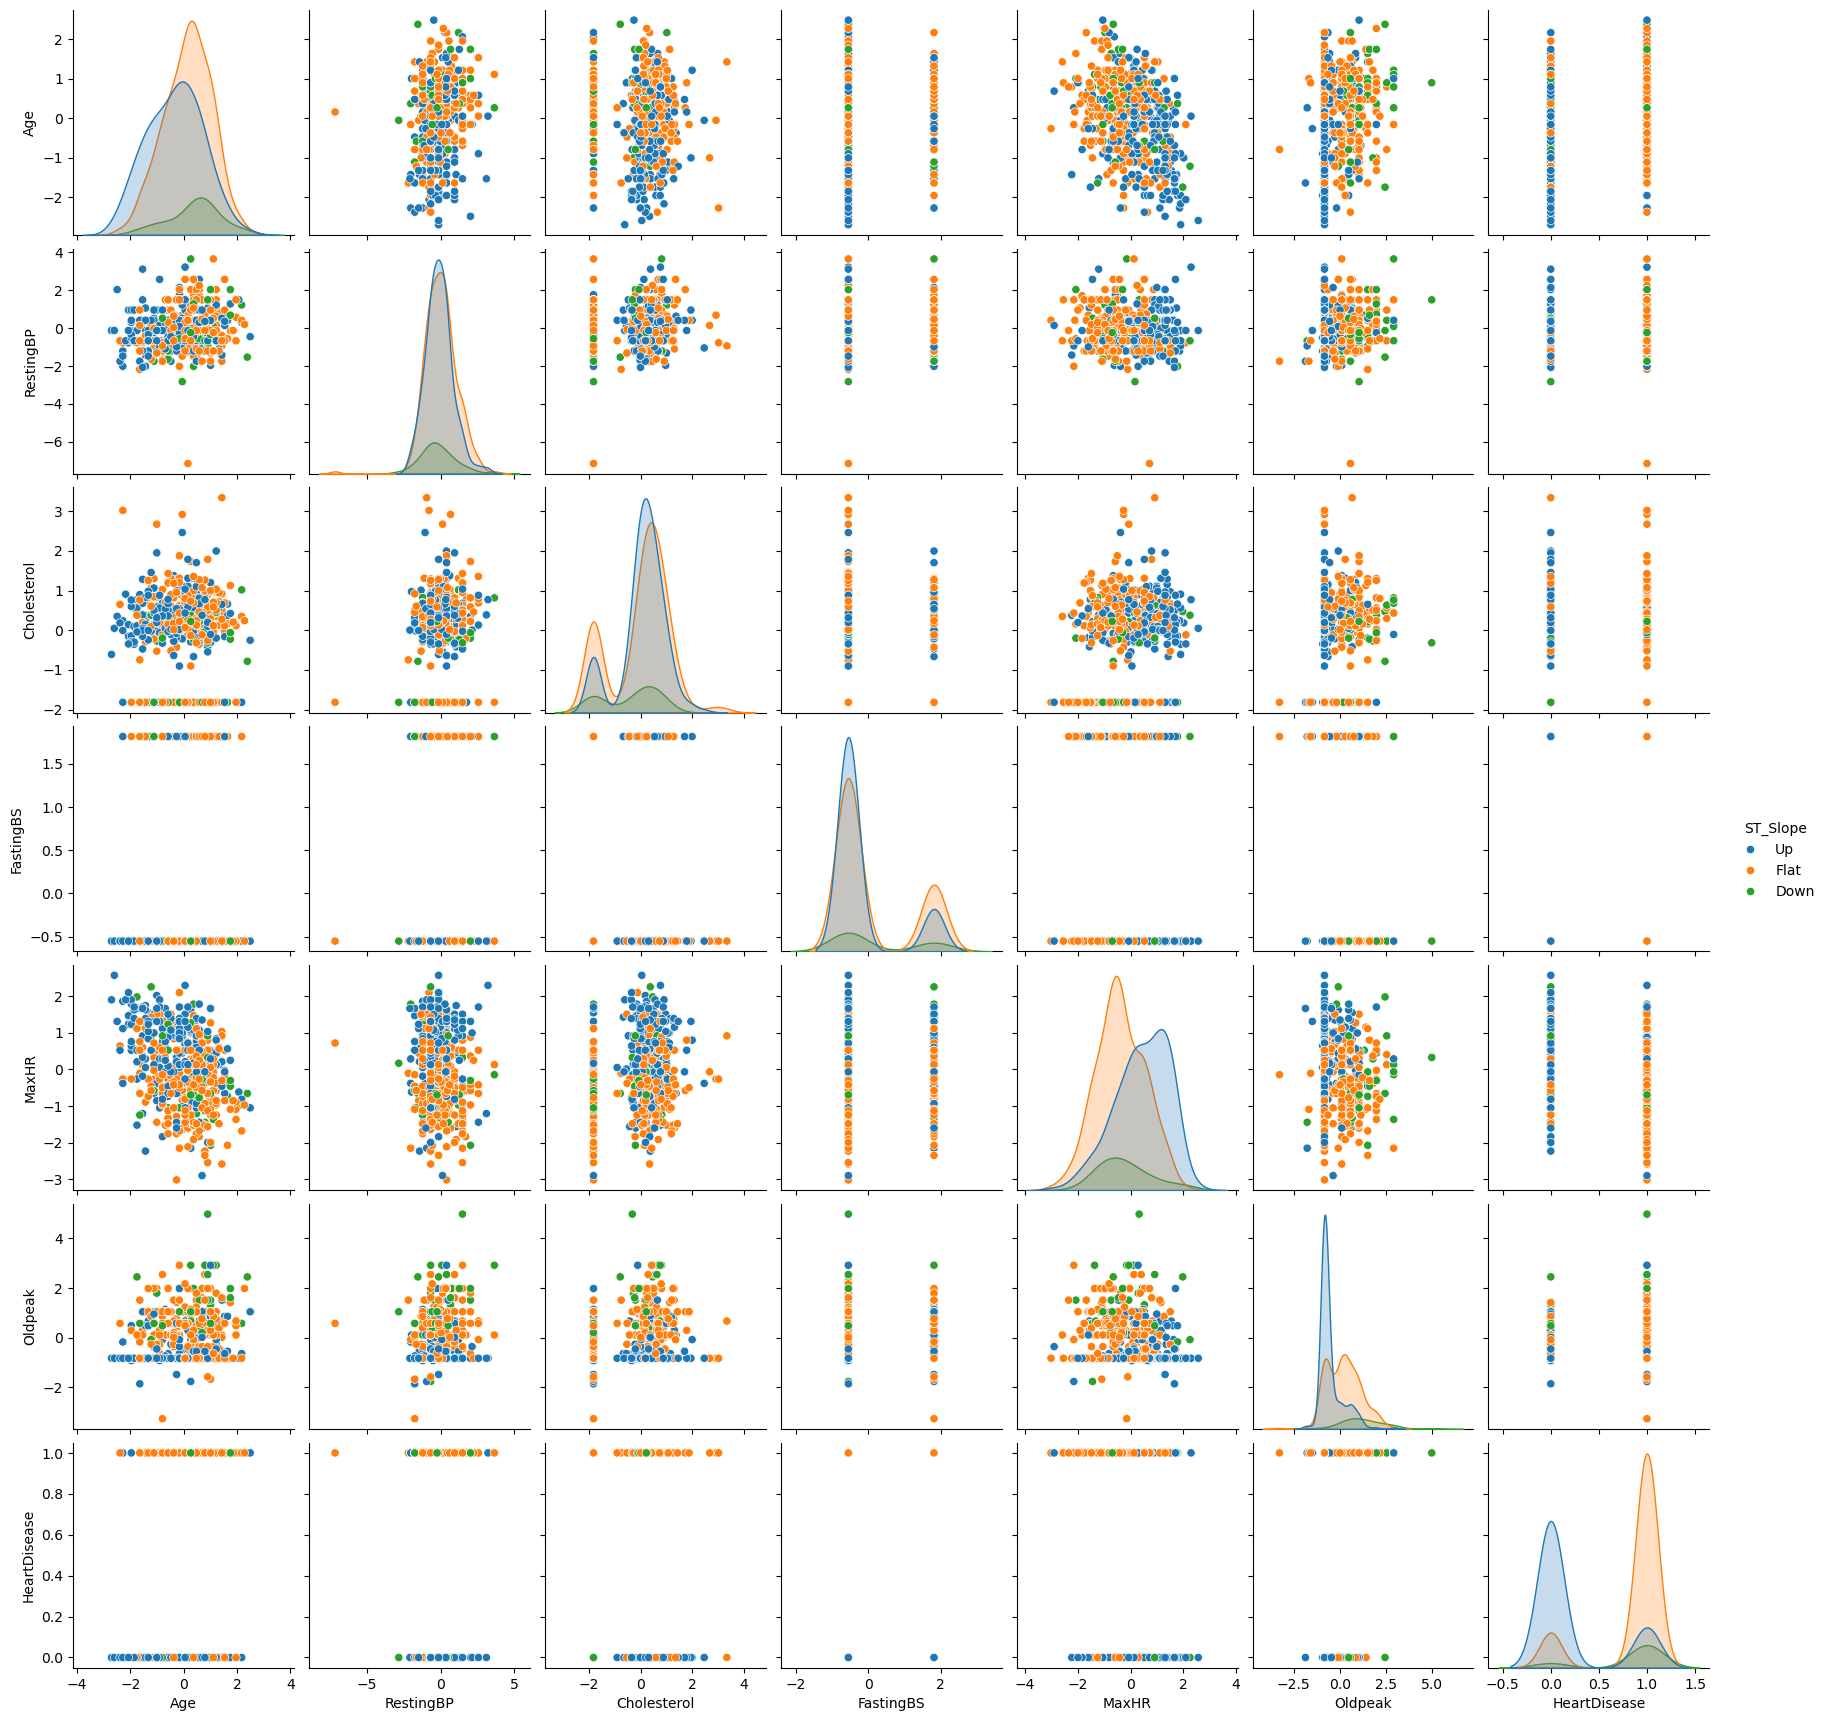

In [66]:
# Pairplot for numerical features
sampled_data = data.sample(500, random_state=42)
sns.pairplot(sampled_data, hue=target_column, diag_kind="kde")
plt.show()

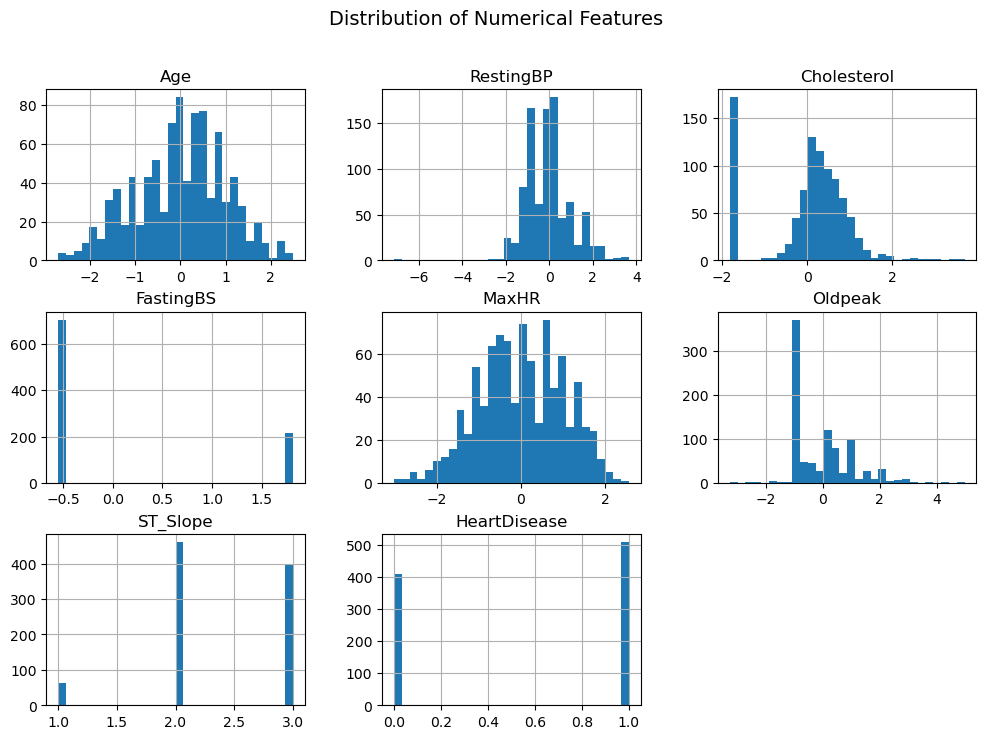

In [67]:
numerical_columns = data_encoded.select_dtypes(include=['number']).columns

# Plot histograms
data_encoded[numerical_columns].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


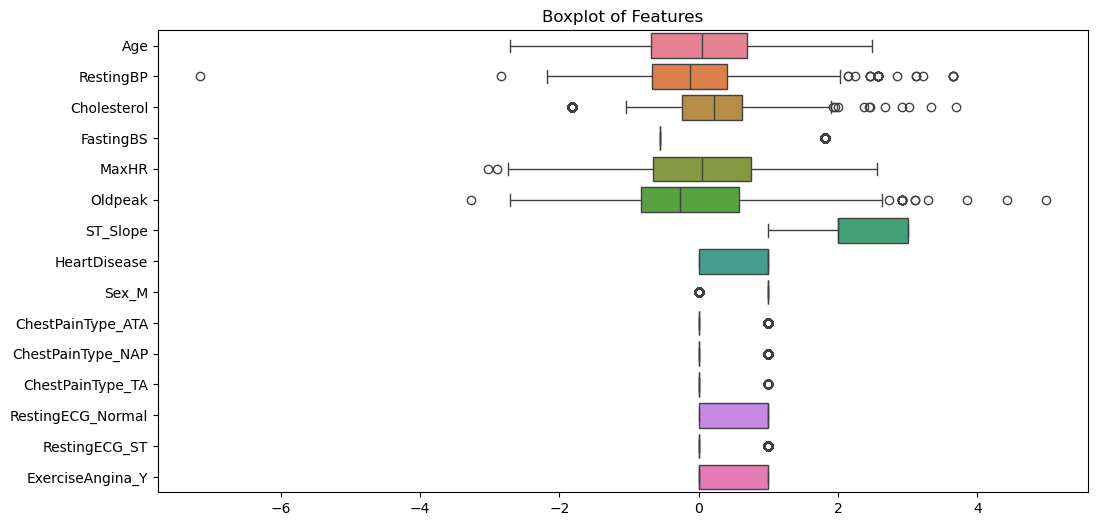

In [68]:
# Boxplot for feature analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_encoded, orient='h')
plt.title('Boxplot of Features')
plt.show()

In [69]:
# Save the cleaned and normalized dataset
cleaned_file_path = 'Dataset\cleaned_heart_failure_dataset_2.csv'
data_encoded.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to Dataset\cleaned_heart_failure_dataset_2.csv
